### Data Exploration

In [46]:
import pandas as pd
traintest = pd.read_csv('train_test.csv') # Used for building and testing model before deploy
validate = pd.read_csv('deploy_validate.csv') # Prepare for validation when model is deployed

In [47]:
# See the size of dataframe
traintest.shape

(103904, 25)

In [48]:
# See top 10 data
traintest.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


### Data Wrangling / Feature Engineering

In [49]:
# Drop unwanted columns
traintest = traintest.drop('Unnamed: 0', axis=1)
traintest = traintest.drop('id', axis=1)
validate = validate.drop('Unnamed: 0', axis=1)
validate = validate.drop('id', axis=1)

In [50]:
# See structure of dataframe
print(traintest.info())
print(validate.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [51]:
# Replace space with undersocre in column names
traintest.columns = traintest.columns.str.replace(' ', '_')
validate.columns = validate.columns.str.replace(' ', '_')

In [52]:
# Transform target variable to binary values
traintest['satisfaction'].replace({'neutral or dissatisfied': 1, 'satisfied': 0},inplace = True)
validate['satisfaction'].replace({'neutral or dissatisfied': 1, 'satisfied': 0},inplace = True)

In [53]:
# Check for missing data
print(traintest.isnull().sum())
print(validate.isnull().sum())

Gender                                 0
Customer_Type                          0
Age                                    0
Type_of_Travel                         0
Class                                  0
Flight_Distance                        0
Inflight_wifi_service                  0
Departure/Arrival_time_convenient      0
Ease_of_Online_booking                 0
Gate_location                          0
Food_and_drink                         0
Online_boarding                        0
Seat_comfort                           0
Inflight_entertainment                 0
On-board_service                       0
Leg_room_service                       0
Baggage_handling                       0
Checkin_service                        0
Inflight_service                       0
Cleanliness                            0
Departure_Delay_in_Minutes             0
Arrival_Delay_in_Minutes             310
satisfaction                           0
dtype: int64
Gender                                0
Cust

In [54]:
# Filling missing values with mean value
traintest['Arrival_Delay_in_Minutes'] = traintest['Arrival_Delay_in_Minutes'].fillna(traintest['Arrival_Delay_in_Minutes'].mean())
validate['Arrival_Delay_in_Minutes'] = validate['Arrival_Delay_in_Minutes'].fillna(validate['Arrival_Delay_in_Minutes'].mean())

### Data Visualization

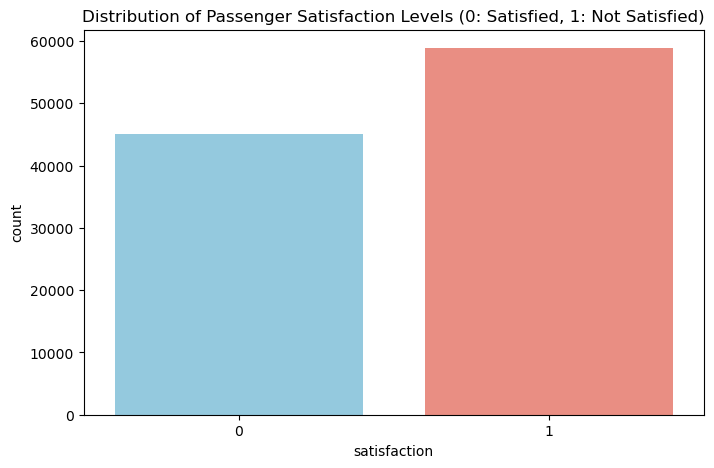

In [55]:
# Check if target variable Satisfaction has balanced classes
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Assuming your DataFrame is named 'train'
plt.figure(figsize=(8, 5))

# Use seaborn's countplot to visualize the distribution of satisfaction
sns.countplot(x='satisfaction', data=traintest, palette=['skyblue', 'salmon'])
plt.title('Distribution of Passenger Satisfaction Levels (0: Satisfied, 1: Not Satisfied)')

plt.show()

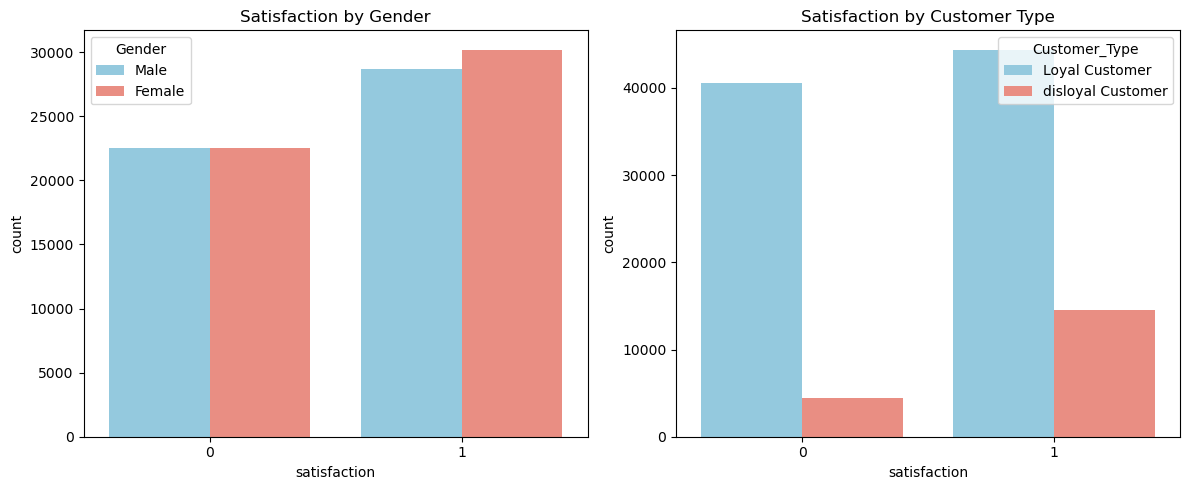

In [56]:
# Check relationship with Satisfaction and Gender/Customer Type
plt.figure(figsize=(12, 5))

# Plotting side-by-side bar charts for satisfaction based on Gender
plt.subplot(1, 2, 1)
sns.countplot(x='satisfaction', hue='Gender', data=traintest, palette=['skyblue', 'salmon'])
plt.title('Satisfaction by Gender')

# Plotting side-by-side bar charts for satisfaction based on Customer Type
plt.subplot(1, 2, 2)
sns.countplot(x='satisfaction', hue='Customer_Type', data=traintest, palette=['skyblue', 'salmon'])
plt.title('Satisfaction by Customer Type')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


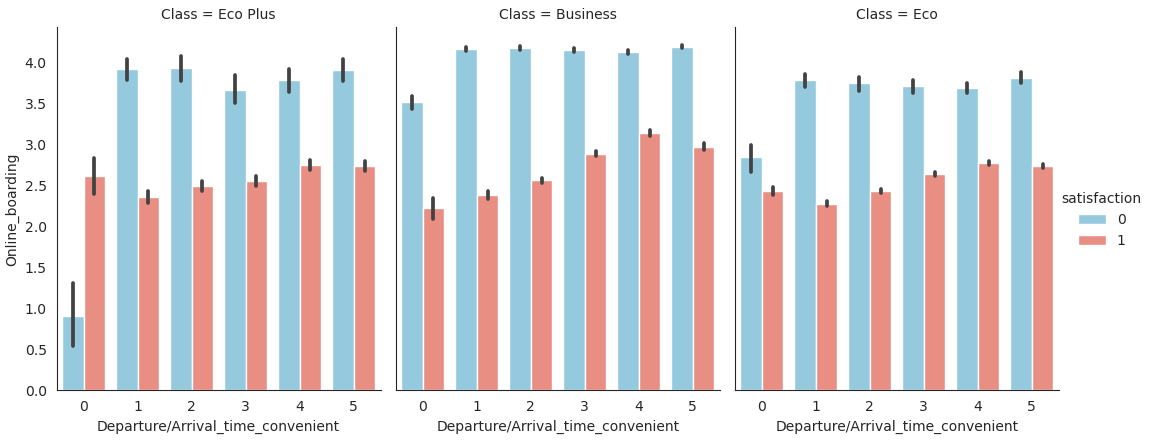

In [57]:
# Explore relationship between Satisfaction, Online_boarding and Departure/Arrival_time_convenient grouped by class
with sns.axes_style('white'):
    g = sns.catplot(x="Departure/Arrival_time_convenient", y="Online_boarding", hue="satisfaction", col="Class", data=traintest, kind="bar", height=4.5, aspect=.8, palette=['skyblue', 'salmon'])

plt.show()

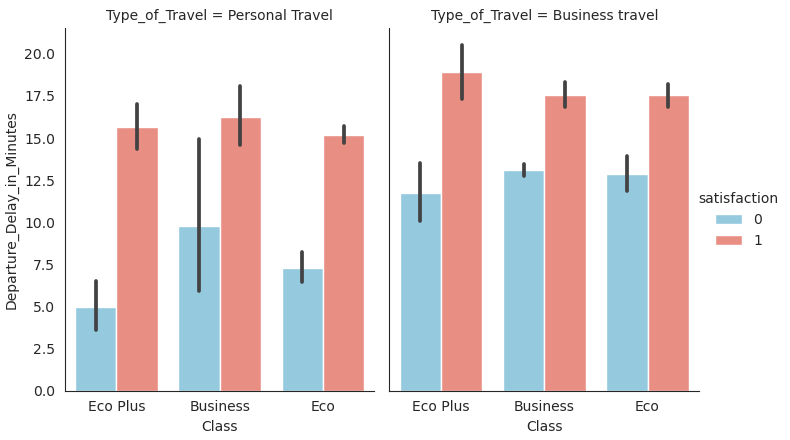

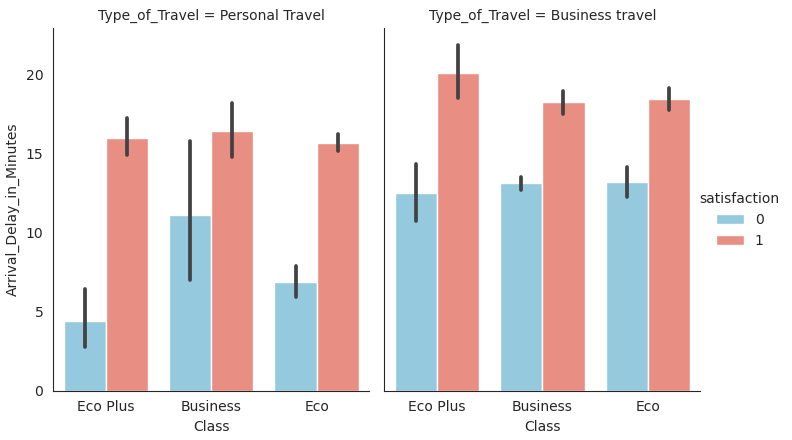

In [58]:
# Explore relationship between Departure_Delay_in_Minutes, Class and satisfaction grouped by Type_of_Travel 
with sns.axes_style('white'):
    g1 = sns.catplot(x="Class", y="Departure_Delay_in_Minutes", hue="satisfaction", col="Type_of_Travel", data=traintest, kind="bar", height=4.5, aspect=.8, palette=['skyblue', 'salmon'])
    g2 = sns.catplot(x="Class", y="Arrival_Delay_in_Minutes", hue="satisfaction", col="Type_of_Travel", data=traintest, kind="bar", height=4.5, aspect=.8, palette=['skyblue', 'salmon'])

plt.show()

### Lable Encoding for Categorical Variables

In [59]:
from sklearn.preprocessing import LabelEncoder
label_encoders_t = {}

# Encode categorical variables using LabelEncoder
for column in traintest.select_dtypes(include=['object']).columns:
    label_encoders_t[column] = LabelEncoder()
    traintest[column] = label_encoders_t[column].fit_transform(traintest[column])

In [60]:
label_encoders_v = {}
for column in validate.select_dtypes(include=['object']).columns:
    label_encoders_v[column] = LabelEncoder()
    validate[column] = label_encoders_v[column].fit_transform(validate[column])

### Remove Outliers

In [61]:
Q1 = traintest.quantile(0.25)
Q3 = traintest.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Gender                                  1.0
Customer_Type                           0.0
Age                                    24.0
Type_of_Travel                          1.0
Class                                   1.0
Flight_Distance                      1329.0
Inflight_wifi_service                   2.0
Departure/Arrival_time_convenient       2.0
Ease_of_Online_booking                  2.0
Gate_location                           2.0
Food_and_drink                          2.0
Online_boarding                         2.0
Seat_comfort                            3.0
Inflight_entertainment                  2.0
On-board_service                        2.0
Leg_room_service                        2.0
Baggage_handling                        2.0
Checkin_service                         1.0
Inflight_service                        2.0
Cleanliness                             2.0
Departure_Delay_in_Minutes             12.0
Arrival_Delay_in_Minutes               13.0
satisfaction                    

In [62]:
# Identify and remove outliers from the dataset
outlier_condition = ~((traintest < (Q1 - 1.5 * IQR)) | (traintest > (Q3 + 1.5 * IQR))).any(axis=1)
traintest = traintest[outlier_condition]

# Display the shape of the updated dataset
print(traintest.shape)

(61197, 23)


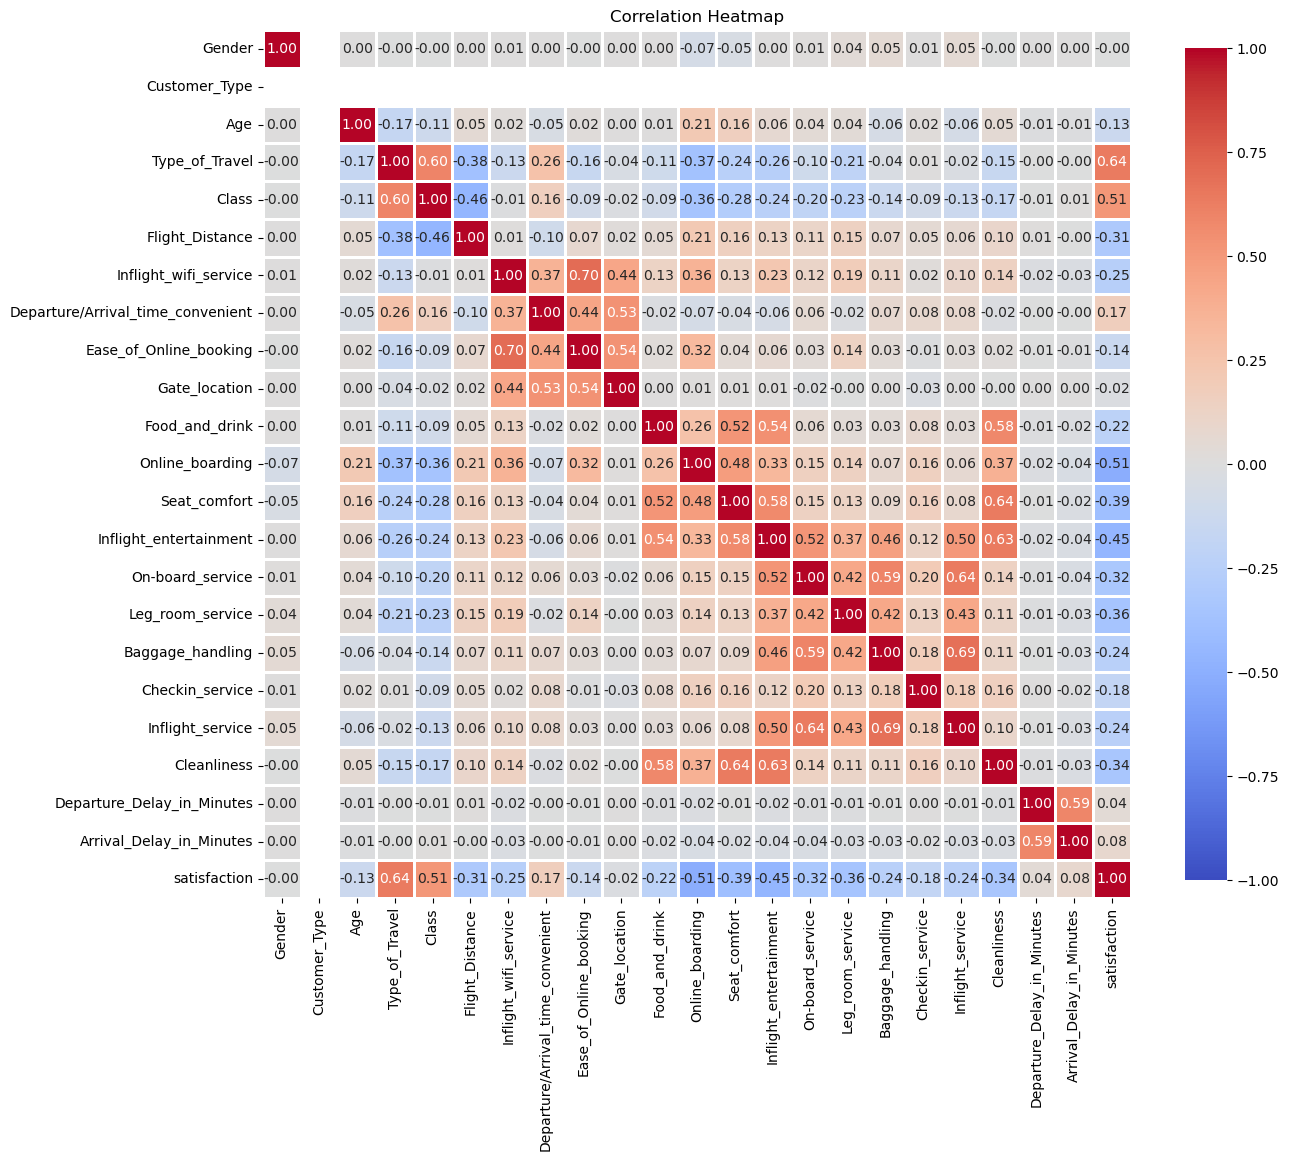

In [63]:
# Show correlation between variables
corr = traintest.corr()

# Create a customized heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, linewidths=1, square=True, cbar_kws={"shrink": 0.9})

plt.title('Correlation Heatmap')
plt.show()

### Feature Selection

In [64]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, chi2

# Create a MinMaxScaler
scaler = preprocessing.MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(traintest), columns=traintest.columns)

# Separate features (X) and target variable (y)
X = scaled_data.drop('satisfaction', axis=1)
y = scaled_data['satisfaction']

# Use SelectKBest with chi2 for feature selection
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)

# Get the selected feature names
selected_features = X.columns[selector.get_support(indices=True)]
print(selected_features)


Index(['Type_of_Travel', 'Class', 'Flight_Distance', 'Inflight_wifi_service',
       'Online_boarding', 'Seat_comfort', 'Inflight_entertainment',
       'On-board_service', 'Leg_room_service', 'Cleanliness'],
      dtype='object')


### Split Data to Train and Test

In [65]:
from sklearn.model_selection import train_test_split

selected_features = ['Type_of_Travel', 'Class', 'Flight_Distance', 'Inflight_wifi_service',
       'Online_boarding', 'Seat_comfort', 'Inflight_entertainment',
       'On-board_service', 'Leg_room_service', 'Cleanliness', 'Baggage_handling', 'Checkin_service', 'Inflight_service']
# Separate features (X) and target variable (y)
X = traintest[selected_features]
y = traintest['satisfaction']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Scaling Independent Variables

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Build Logistic Regression Model with Default Setting

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, recall_score, precision_score, f1_score

# Initialize the logistic regression model
lg_model = LogisticRegression()

# Fit the model to the training data
lg_model.fit(X_train, y_train)

# Predictions on the test set
y_pred = lg_model.predict(X_test)

# Get the hyperparameters of the model
hyperparameters = lg_model.get_params()

# Print the hyperparameters
print("Model Hyperparameters:")
for param, value in hyperparameters.items():
    print(f"{param}: {value}")

# Evaluate the performance metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, lg_model.predict_proba(X_test)[:, 1])
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display results
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

Model Hyperparameters:
C: 1.0
class_weight: None
dual: False
fit_intercept: True
intercept_scaling: 1
l1_ratio: None
max_iter: 100
multi_class: auto
n_jobs: None
penalty: l2
random_state: None
solver: lbfgs
tol: 0.0001
verbose: 0
warm_start: False

Confusion Matrix:
 [[5438  722]
 [ 644 5436]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.89      6160
           1       0.88      0.89      0.89      6080

    accuracy                           0.89     12240
   macro avg       0.89      0.89      0.89     12240
weighted avg       0.89      0.89      0.89     12240

Accuracy: 0.8884
Recall: 0.8941
Precision: 0.8828
F1-score: 0.8884
ROC-AUC: 0.9439


### Build Logistic Regression Model with Hyperparameter Tuning

In [68]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

logreg_model = LogisticRegression()

# Define hyperparameters to tune
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# Define grid search
param_grid = dict(solver=solvers, penalty=penalty, C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=logreg_model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='recall', error_score=0)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Use the best model for predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)



# Display the results
print("\n")
print("Tuning hyperparameters for recall\n")
print("Grid scores for all the models based on CV:\n")
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print("%0.5f (+/-%0.05f) for %r" % (mean, std * 2, params))
print("\n")
print("Best Hyperparameters:", best_params)
print(f"Accuracy of the Best Model: {accuracy:.6f}")
print(f"Recall of the Best Model: {recall:.6f}")
print(f"Precision of the Best Model: {precision:.6f}")
print(f"F1-score of the Best Model: {f1:.6f}")
print(f"ROC-AUC of the Best Model: {roc_auc:.6f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

/Users/eddie/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/eddie/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/eddie/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/eddie/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype



Tuning hyperparameters for recall

Grid scores for all the models based on CV:

0.88935 (+/-0.01432) for {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.88935 (+/-0.01432) for {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.88935 (+/-0.01432) for {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.88935 (+/-0.01432) for {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.88935 (+/-0.01432) for {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.88935 (+/-0.01432) for {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.88933 (+/-0.01431) for {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.88933 (+/-0.01431) for {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.88933 (+/-0.01431) for {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.88924 (+/-0.01434) for {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.88924 (+/-0.01434) for {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.88928 (+/-0.01432) for {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.88921 (+/-0.01401) for 

### Export editted validate dataframe

In [71]:
validate.to_csv('validate_editted.csv', index=False)

### Export model and standard scaler to pickle files

In [72]:
import joblib
import os

if not os.path.exists('Model'):
  os.mkdir('Model')
if not os.path.exists('Scaler'):
  os.mkdir('Scaler')

joblib.dump(best_model, r'Model/model.pickle')
joblib.dump(scaler, r'Scaler/scaler.pickle')

['Scaler/scaler.pickle']

### Import Model and Scaler

In [81]:
deploy_model = joblib.load(r'Model/model.pickle')
deploy_scaler = joblib.load(r'Scaler/scaler.pickle')

### Import Editted Dataset

In [82]:
deploy_validate = pd.read_csv('validate_editted.csv')

### Feature Selection & Scaling


In [83]:
prediction_columns = deploy_validate[selected_features]

# Scale prediction columns
prediction_columns[selected_features] = deploy_scaler.transform(prediction_columns[selected_features])

### Predict the outcome

In [79]:
output = deploy_model.predict(prediction_columns)
deploy_validate['Prediction'] = output
deploy_validate

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction,Prediction
0,0,0,52,0,1,160,5,4,3,4,...,5,5,5,2,5,5,50,44.0,0,0
1,0,0,36,0,0,2863,1,1,3,1,...,4,4,4,3,4,5,0,0.0,0,0
2,1,1,20,0,1,192,2,0,2,4,...,4,1,3,2,2,2,0,0.0,1,1
3,1,0,44,0,0,3377,0,0,0,2,...,1,1,1,3,1,4,0,6.0,0,1
4,0,0,49,0,1,1182,2,3,4,3,...,2,2,2,4,2,4,0,20.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,1,1,34,0,0,526,3,3,3,1,...,3,2,4,4,5,4,0,0.0,1,0
25972,1,0,23,0,0,646,4,4,4,4,...,4,5,5,5,5,4,0,0.0,0,0
25973,0,0,17,1,1,828,2,5,1,5,...,4,3,4,5,4,2,0,0.0,1,1
25974,1,0,14,0,0,1127,3,3,3,3,...,3,2,5,4,5,4,0,0.0,0,0


### Evaluate the model based on this new dataset

In [80]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score

# Get the actual values
actual_values = deploy_validate['satisfaction'] 

# Calculate accuracy
accuracy = accuracy_score(actual_values, output)

# Calculate recall
recall = recall_score(actual_values, output)

# Calculate ROC-AUC
roc_auc = roc_auc_score(actual_values, output)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

Accuracy: 0.8270
Recall: 0.7981
ROC-AUC: 0.8311
